In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ipython-autotime
%load_ext autotime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00
time: 490 µs (started: 2023-01-06 21:25:47 +00:00)


In [ ]:
!unzip /content/drive/MyDrive/Project/Face_Classification/face_images.zip -d /content/drive/MyDrive/Project/Face_Classification/Face_images


In [ ]:
import cv2 
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Project/Face_Classification/(English translate)20210426_image_classification_Imbesideyou.xlsx')
#renaming the column names
df.rename(columns=df.iloc[0],inplace = True)
#th row drop
df.drop(df.index[0],inplace=True)
print(df.columns)
#dropping the first two columns
df.drop(df.iloc[:, :2], axis=1,inplace=True)
images = [] 
f_img = list(df['Mask: Y/N\n"-" is not for face images'])
person_id = list(df['Person ID'])
pid=[]
#print(f_img[0])
c=0
#giving the file path to read the files
for file in glob.glob('/content/drive/MyDrive/Project/Face_Classification/Face_images/face_images/a055a66f-46ea-4c57-8de4-f3cc4f27c59c/*.jpg'):
  if(f_img[c]=='N'):
    ig = cv2.imread(file)
    res = cv2.resize(ig, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    images.append(res)
    pid.append(person_id[c])  #loading images from the givin file
  c=c+1
for file in glob.glob('/content/drive/MyDrive/Project/Face_Classification/Face_images/face_images/dd40a338-faf9-481d-996c-6fe0f648d0b7/*.jpg'):
  if(f_img[c]=='N'):
    ig = cv2.imread(file)
    res = cv2.resize(ig, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    images.append(res)
    pid.append(person_id[c]) 
  c=c+1
for file in glob.glob('/content/drive/MyDrive/Project/Face_Classification/Face_images/face_images/f5845e49-256f-4d70-9214-47bd5358c9d1/*.jpg'):
  if(f_img[c]=='N'):
    ig = cv2.imread(file)
    res = cv2.resize(ig, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    images.append(res)
    pid.append(person_id[c]) 
  c=c+1
#df.head()

print(len(images))
print(images[0].shape)
print(len(pid))
print(c)
# plt.imshow(images[0],cmap="gray")

Index([nan, 'NO', 'File name', 'Person ID',
       'Mask: Y/N\n"-" is not for face images'],
      dtype='object')
30082
(32, 32, 3)
30082
57898


In [ ]:
import collections
# pid = np.array(pid)
# np.unique(pid)
collections.Counter(pid)

Counter({1.0: 8924, 4.0: 7460, 3.0: 5971, 2.0: 7727})

In [ ]:
from sklearn.model_selection import train_test_split
imgs = np.array(images)
x = imgs.astype('float32') / 255.0 - 0.5
# X_train, X_test, y_train, y_test = train_test_split(images, ids, test_size=0.3, random_state=42)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import save_model
import tensorflow.keras.layers
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model


    # encoder
encoder = tensorflow.keras.models.Sequential()
encoder.add(tensorflow.keras.layers.InputLayer((32, 32, 3)))
    
encoder.add(tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
encoder.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))
encoder.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
encoder.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))
encoder.add(tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
encoder.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))
encoder.add(tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
encoder.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))
encoder.add(tensorflow.keras.layers.Flatten())
encoder.add(tensorflow.keras.layers.Dense(128))

    # decoder
decoder = tensorflow.keras.models.Sequential()
decoder.add(tensorflow.keras.layers.InputLayer((128,)))
    
    ### YOUR CODE HERE: define decoder as per instructions above ###
decoder.add(tensorflow.keras.layers.Dense(2*2*256))
decoder.add(tensorflow.keras.layers.Reshape((2, 2, 256)))
decoder.add(tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
decoder.add(tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
decoder.add(tensorflow.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
decoder.add(tensorflow.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))





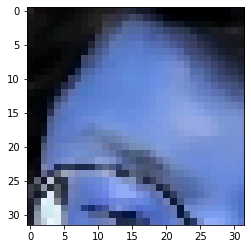

In [ ]:
inp = tensorflow.keras.layers.Input((32,32,3))
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = tensorflow.keras.models.Model(inp,reconstruction)
autoencoder.compile('adamax','mse')
plt.imshow(imgs[5])

In [ ]:
autoencoder.fit(x=imgs,y=imgs,epochs=15, validation_split=0.3, batch_size=70, verbose=1)

Epoch 1/15
301/301 [==============================] - 86s 281ms/step - loss: 2587.0002 - val_loss: 1443.7454
Epoch 2/15
301/301 [==============================] - 85s 282ms/step - loss: 1067.6146 - val_loss: 1076.6849
Epoch 3/15
301/301 [==============================] - 84s 279ms/step - loss: 807.5678 - val_loss: 911.9669
Epoch 4/15
301/301 [==============================] - 88s 292ms/step - loss: 687.9883 - val_loss: 796.1129
Epoch 5/15
301/301 [==============================] - 85s 281ms/step - loss: 619.1125 - val_loss: 732.4547
Epoch 6/15
301/301 [==============================] - 85s 282ms/step - loss: 566.8257 - val_loss: 701.3790
Epoch 7/15
301/301 [==============================] - 85s 282ms/step - loss: 536.6190 - val_loss: 654.6635
Epoch 8/15
301/301 [==============================] - 84s 280ms/step - loss: 506.5219 - val_loss: 625.6414
Epoch 9/15
301/301 [==============================] - 84s 278ms/step - loss: 484.8022 - val_loss: 597.5538
Epoch 10/15
301/301 [============

In [ ]:
y = autoencoder.predict(imgs[2].reshape(-1,32,32,3))
# plt.imshow(y[0])
bottle_neck=[]
for i in range(len(imgs)):
  inp = encoder(imgs[i].reshape(-1,32,32,3))
  bottle_neck.append(inp[0])
print(len(bottle_neck))
# plt.imshow(X[0].reshape(-1,32,32,3))
print(np.array(bottle_neck))

1/1 [==============================] - 0s 148ms/step
30082
[[-229.28946   199.0799      8.26963  ... -335.09348    84.2735
     8.904257]
 [-279.6001     99.45916  -193.0558   ...  -79.30201   244.63995
    56.268776]
 [-209.89159    34.440144 -273.529    ... -109.87807   -20.743443
   -39.56185 ]
 ...
 [ 535.3886    682.105      34.338326 ...   73.36366    51.362183
   198.61774 ]
 [  27.780231  119.5717    -89.66055  ... -103.63884    48.72152
   137.72275 ]
 [-186.72784   131.93314  -302.78754  ... -289.20102   -15.888614
    61.178284]]


In [ ]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
# epochs = 1
# batch_size = 2000
print(np.array(images).shape)
imgs = np.array(images)
# y_train = np.array(y_train)
# X_test  = np.array(X_test)
# y_test  = np.array(y_test)


# from keras.preprocessing.image import ImageDataGenerator
# generated_data = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=0,  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True, vertical_flip = False)
# generated_data.fit(X_train)
# print(np.array(y_train).shape)
# autoencoder.fit_generator(generated_data.flow(X_train, X_train, batch_size=batch_size), steps_per_epoch=X_train.shape[0],epochs=epochs, validation_data=(X_test, X_test), callbacks=checkpoints)
# Training Model:
# autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)
autoencoder.compile(optimizer='rmsprop', loss='mse')
history = autoencoder.fit(
      imgs,
      imgs,
      epochs=20, 
      batch_size=100, validation_split=0.10
        )  

(30082, 32, 32, 3)
Epoch 1/20
271/271 [==============================] - 102s 370ms/step - loss: 4811.3086 - val_loss: 1855.0262
Epoch 2/20
271/271 [==============================] - 95s 350ms/step - loss: 1784.9490 - val_loss: 2605.5378
Epoch 3/20
271/271 [==============================] - 92s 340ms/step - loss: 1378.5955 - val_loss: 946.9558
Epoch 4/20
271/271 [==============================] - 93s 343ms/step - loss: 1176.2596 - val_loss: 996.9766
Epoch 5/20
271/271 [==============================] - 93s 341ms/step - loss: 1044.7181 - val_loss: 963.6762
Epoch 6/20
271/271 [==============================] - 93s 342ms/step - loss: 951.3413 - val_loss: 1338.8054
Epoch 7/20
271/271 [==============================] - 92s 341ms/step - loss: 890.2167 - val_loss: 876.9851
Epoch 8/20
271/271 [==============================] - 92s 340ms/step - loss: 840.0347 - val_loss: 720.9719
Epoch 9/20
271/271 [==============================] - 92s 338ms/step - loss: 793.5652 - val_loss: 1199.3467
Epoch 10

1/1 [==============================] - 0s 269ms/step


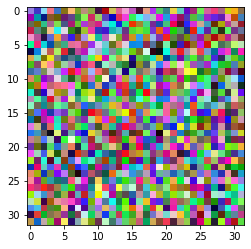

In [ ]:
y = autoencoder.predict(images[0].reshape(-1, 32, 32, 3))
plt.imshow(cv2.cvtColor((y[0] * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
# plt.imshow((y[0] * 255).astype(np.uint8))
# print(y.shape)
